In [38]:
from sklearn.datasets import load_iris

import numpy as np
import pandas as pd


from sklearn.cross_validation import train_test_split
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier



import seaborn as sns
import matplotlib.pyplot as plt
import pdvega as pdv

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load dataset  and visualise

In [14]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [15]:
iris.data.shape

(150, 4)

In [16]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
np.unique(iris.target)

array([0, 1, 2])

In [18]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
iris_features_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_features_df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.198667  
std            0.763161  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

In [20]:
iris_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [21]:
iris_label_df= pd.DataFrame(iris.target, columns=['species'])
iris_label_df['species'].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [22]:
iris1 = pd.concat([iris_features_df, iris_label_df], axis=1)

#### interactive scatter plot using pdvega liberary

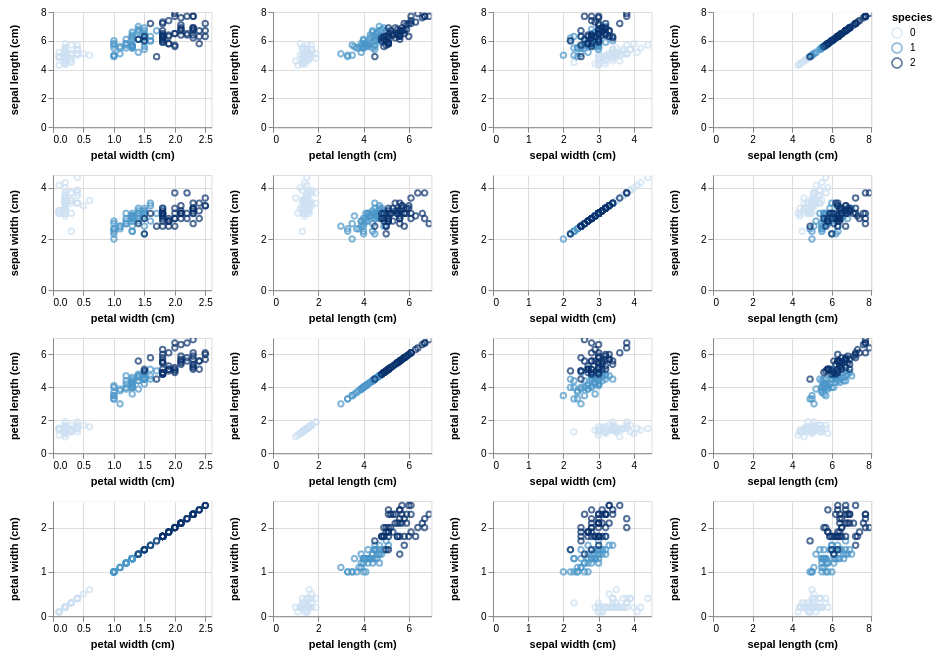

In [63]:
pdv.scatter_matrix(iris1, 'species',figsize=(11, 8))

#### plot all features in single plot

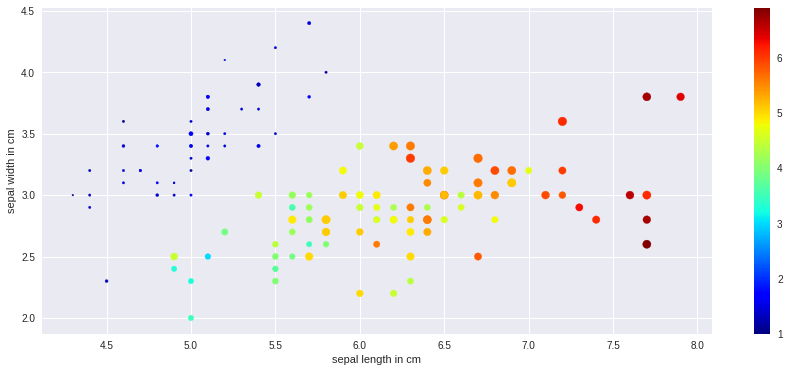

In [40]:
x = plt.figure(figsize=(15,6))
x = plt.scatter(x =iris.data[:,0], y= iris.data[:,1], 
                c=iris.data[:,2], s=iris.data[:,3]*30,
                cmap=plt.get_cmap('jet'))
x = plt.xlabel('sepal length in cm')
x = plt.ylabel('sepal width in cm')
x = plt.colorbar()

#### conclusions:

\begin{enumerate}
\item Iris dataset consists of flower measurements for three species of iris flower.
\item Our task is to predict the species labels of a set of flowers based on their flower measurements.
\item Size on dataset is \textbf{150 * 4}
\item Data set consists of 50 samples from each of three species of Iris(150 samples)
\item Each sample has 4 features
\begin{itemize}
\item sepal length in cm 
\item sepal width in cm 
\item petal length in cm 
\item petal width in cm
\end{itemize}
\item Target has 3 classes
\begin{itemize}
\item 0 : Iris Setosa 
\item 1 : Iris Versicolour
\item 2 : Iris Virginica
\end{itemize}
\item Data set doesn't has any missing values
\item \textbf{From scatter matrix plot}: One of the clusters contains Iris setosa, while the other cluster contains both Iris virginica and Iris versicolor. 
\end{enumerate}

# partition in training and testing sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=42)

# unsupervised learning 

##### KMeans model is using for unsupervise learning 

In [27]:
model = PCA(n_components=2) 
model.fit(X_train) 
X_2D = model.transform(X_train) 

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

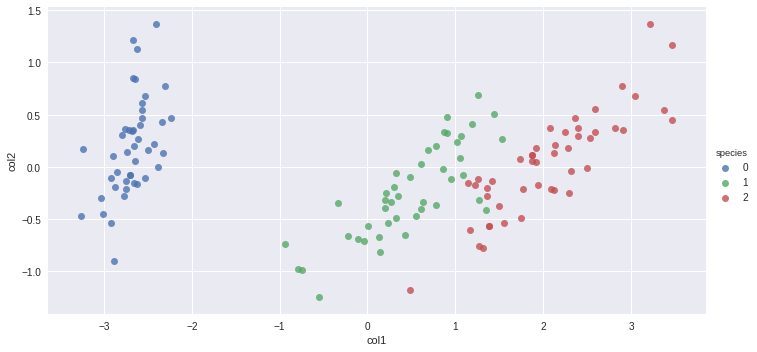

In [64]:
X = pd.DataFrame(X_2D, columns=['col1', 'col2'])
X1 = pd.concat([X, pd.DataFrame(y_train, columns=['species'])], axis=1)
x = sns.lmplot(x = 'col1', y = 'col2', data =X1, hue = 'species', fit_reg=False, size=5, aspect=2)
# sns.set(rc={'figure.figsize':(10,8)})
# sns.regplot(x = 'col1', y = 'col2', data =X1)

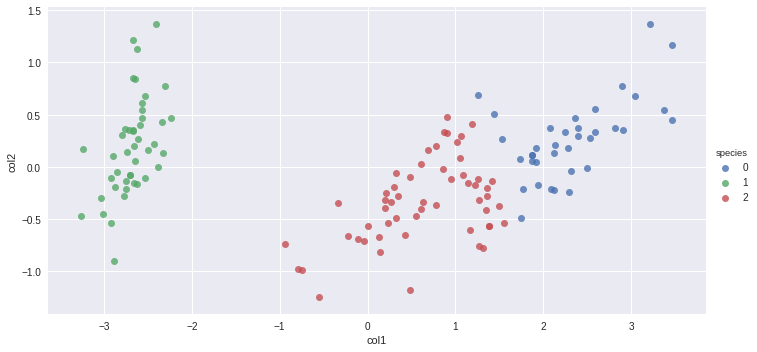

In [30]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_2D)
y_label = kmeans.labels_
Y = pd.DataFrame(y_label, columns=['species'])
X2 = pd.concat([X, Y], axis=1)
x = sns.lmplot(x = 'col1', y = 'col2', data =X2, hue = 'species', fit_reg=False, size=5, aspect=2)

In [54]:
# silhouette score
silhouette_score(X_2D, y_label, metric='euclidean', random_state=42)

0.5939968067528354

#### about silhouette_score

\begin{itemize}
\item The Silhouette Coefficient is used of evalution
\item The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores 
around zero indicate overlapping clusters.
\item The Silhouette Coefficient is defined for each sample and is composed of two scores
\begin{itemize}
\item a: The mean distance between a sample and all other points in the same class.
\item b: The mean distance between a sample and all other points in the next nearest cluster.
\end{itemize}
\end{itemize}
\[ s= \frac{b - a} {max(a,b)} \]

# supervised learning

In [31]:
# creating objects 
sgd_clf = SGDClassifier(random_state=42,  max_iter=5)
rf_clf = RandomForestClassifier(random_state=42)
sv_clf = SVC(random_state=42)

#### cross validating models

In [32]:
sgd_pre = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
rf_pre  = cross_val_predict(rf_clf, X_train, y_train, cv = 3)
sv_pre  = cross_val_predict(sv_clf, X_train,y_train, cv = 3)

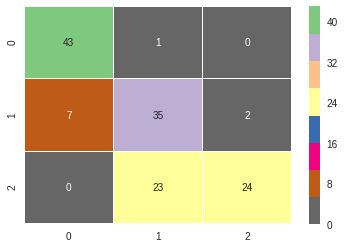

In [35]:
# confusion matrix for SGDClassifier
x = sns.heatmap(confusion_matrix(y_train, sgd_pre),  annot=True,linewidths=.2,cmap='Accent_r')

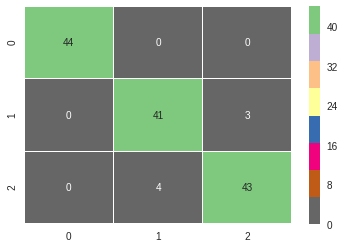

In [36]:
# confusion matrix for RandomForestClassifier
x = sns.heatmap(confusion_matrix(y_train, rf_pre), annot=True,linewidths=.2,cmap='Accent_r' )

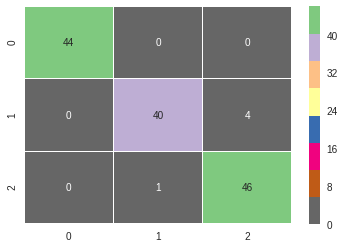

In [37]:
# confusion matrix for SVClassifier
x = sns.heatmap(confusion_matrix(y_train, sv_pre), annot=True,linewidths=.2,cmap='Accent_r')

#### conclusion:

\begin{itemize}
\item From the values of diagonal elements  of confusion martix we can state whether classes are classified correctly or not.
\item Higher the diagonal elements value they were classified correctly.
\item Support vector classifier(SVClassifier) classified more accuratly then SGDClassifier and RandomForestClassifier.
\end{itemize}

In [60]:
# training models
x = sgd_clf.fit(X_train, y_train)
x = rf_clf.fit(X_train, y_train)
x = sv_clf.fit(X_train, y_train)

In [28]:
# confusion matrix for SGDClassifier
confusion_matrix(y_train,sgd_clf.predict(X_train))

array([[44,  0,  0],
       [23,  2, 19],
       [ 0,  0, 47]])

In [29]:
# confusion matrix for RandomForestClassifier
confusion_matrix(y_train, rf_clf.predict(X_train))

array([[44,  0,  0],
       [ 0, 44,  0],
       [ 0,  0, 47]])

In [30]:
# confusion matrix for SVClassifier
confusion_matrix(y_train, sv_clf.predict(X_train))

array([[44,  0,  0],
       [ 0, 42,  2],
       [ 0,  0, 47]])

## comparing One Vs Rest with One vs One

In [59]:
ovo_sgd_clf = OneVsOneClassifier(SGDClassifier(random_state=42,  max_iter=5))
ovr_sgd_clf = OneVsRestClassifier(SGDClassifier(random_state=42,  max_iter=5))
x = ovo_sgd_clf.fit(X_train, y_train)
x = ovr_sgd_clf.fit(X_train, y_train)

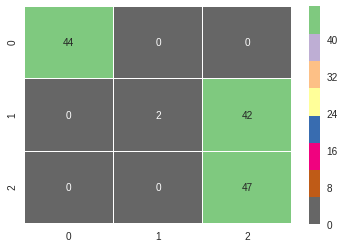

In [57]:
x =sns.heatmap(confusion_matrix(y_train,ovo_sgd_clf.predict(X_train)),
               annot=True,linewidths=.2,cmap='Accent_r')

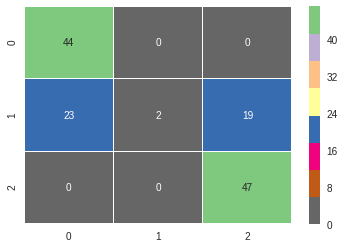

In [58]:
x = sns.heatmap(confusion_matrix(y_train,ovr_sgd_clf.predict(X_train)),
                annot=True,linewidths=.2,cmap='Accent_r')
                                 